<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/Classifier_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls -a

.  ..  .config	sample_data


In [ ]:
%%capture
!pip install fastbook

In [19]:
import re
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pathlib
from IPython.display import Image
from google.colab import drive
import os
drive.mount('/content/drive')
config_file = Path("~/.fastai/config.yml").expanduser()
config.d
if config_file.exists(): os.remove(config_file)
assert not config_file.exists()
config = Config()
assert config_file.exists()
config['archive_path'] = Path('root/content/drive/archive')
config['data_path'] = Path('root/content/drive/data')
config['model_path'] = Path('root/content/drive/models')
config['storage_path'] = Path('root/tmp')
config.save()
config.d
print("Please continue")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Please continue


{'archive_path': 'root/content/drive/archive',
 'data_path': 'root/content/drive/data',
 'model_path': 'root/content/drive/models',
 'storage_path': 'root/tmp',
 'version': 2}

In [ ]:
path = untar_data(URLs.PETS)
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
len(files)

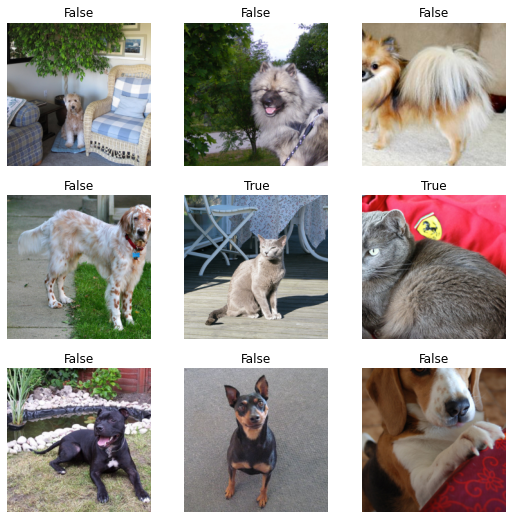

In [20]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.136804,0.289925,0.082544,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.077078,0.096723,0.029093,00:49


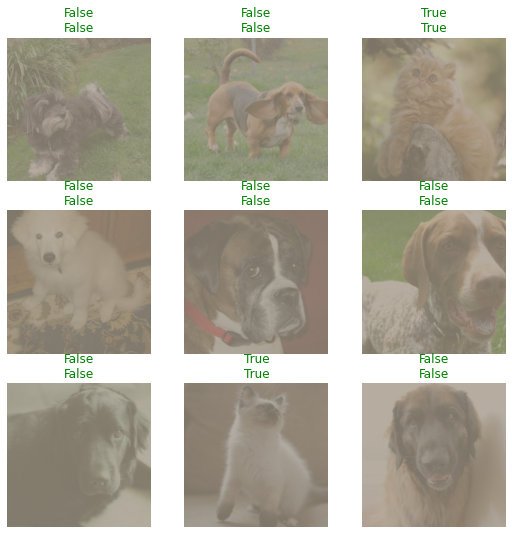

In [22]:
learn.show_results()

In [23]:
files[0].name
#def label_func(f): return re.sub("_[^_]+$", "",f)
pat = r'^(.*)_\d+.jpg'

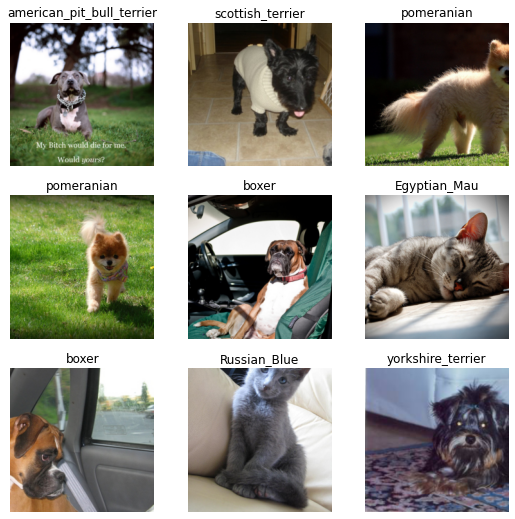

In [25]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

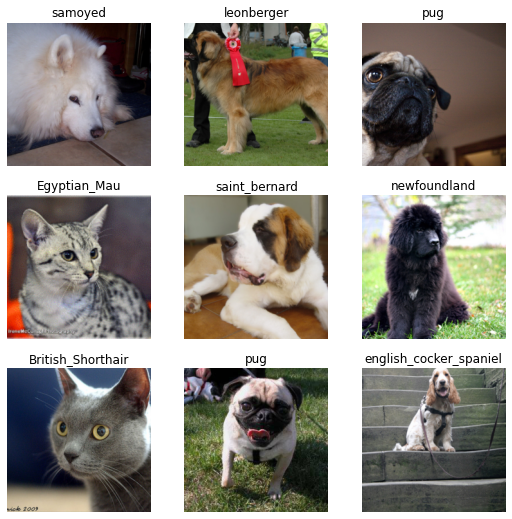

In [26]:
dls.show_batch()

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0030199517495930195)

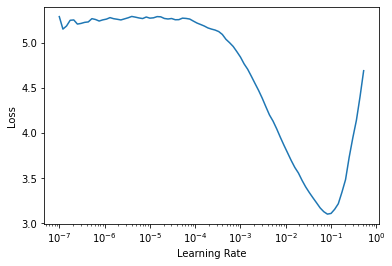

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.294198,1.009054,0.301759,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.509148,1.119417,0.313261,01:07
1,0.325311,0.868610,0.263870,01:06
